<a href="https://colab.research.google.com/github/sheikmohdimran/hackathon/blob/master/NLP_NER_Pharmacovigilance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import glob

mylist = [f for f in glob.glob("*.json")]
final_df = pd.DataFrame()

In [0]:
l=0
for filename in mylist:
  x=filename.split('-')[-1].split('.')[0]
  with open(filename, 'r') as f:
    datastore = json.load(f)
    sentences=json_normalize(data=datastore['sentences'], record_path=['tokens'])
    mentions=json_normalize(datastore['mentions'])[['begin','end','type']]
    mentions['type']='I-'+mentions['type']
    j=mentions
    k='whiteSpace'
    for i in range(len(mentions)):
      sentences.loc[(sentences['end']>j.iloc[i,0]) & (sentences['end']<=j.iloc[i,1])
                    , k] = j.iloc[i,2]
  
  
    sentences.loc[(sentences.whiteSpace==False) , 'whiteSpace'] = 'O'
    sentences.id=x+sentences.id.str.replace('-t[0-9]+', '')
    ## Delete References
    a=sentences[sentences.text.str.upper()=='REFERENCES']
    ## Handle Documents without references
    if a.empty:
      a=sentences.iloc[-1,1]
    else:
      a=a.iloc[0,1]

    final_df=final_df.append(sentences[(sentences.end)<a]) 

final_df.reset_index(inplace=True)

In [0]:
final_df.loc[(final_df.whiteSpace=='I-AuthorNameInVancouver') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-AgeGroupOfPatient') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterFaxNumber') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterAltPhone') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterPostalCode') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterState') , 'whiteSpace'] = 'O'

final_df.loc[(final_df.whiteSpace=='I-RaceOfPatient') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterSalutation') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterSuffix') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-PageOfPublication') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterPhoneNumber') , 'whiteSpace'] = 'O'

In [4]:
#EDA
#final_df[(final_df.text=='Ibuprofen')]
#final_df[(final_df.whiteSpace=='I-SuspectedProductName')].text.str.lower().value_counts(sort=True)
#final_df[(final_df.whiteSpace=='I-SuspectedProductName')&((final_df.text=='olanza')|(final_df.text=='pine')|(final_df.text=='-'))]
#final_df[(final_df.whiteSpace=='I-SuspectedProductName')].text.str.lower().unique()
final_df[(final_df.text.isin(['ibuprofen','olanzapine','clozapine',
                              'fluoxetine','atorvastatin','quetiapine']))].whiteSpace.value_counts(sort=True)

O                         479
I-SuspectedProductName    291
I-ArticleTitle              2
I-JournalName               1
Name: whiteSpace, dtype: int64

In [5]:
final_df[(final_df.whiteSpace=='I-ReportedIndication')].text.str.lower().unique()#.value_counts(sort=True)

array(['tension', 'headaches', 'schizophrenia', 'increased', 'agitation',
       'yelling', 'persistent', 'delusional', 'disorder', 'schizophrenic',
       'management', 'of', 'delirium', 'chemotherapy', 'induced',
       'nausea', 'and', 'vomiting', 'onset', 'the', 'appeared', 'to',
       'be', 'temporally', 'related', 'commencing', 'treatment', 'with',
       'enzalutamide', 'depression', 'vasculitis', 'hyperlipidemia',
       'treatment-resistant', 'residual', 'treatmentresistant',
       'depressive', 'episode', '(', 'moderate', ')', 'symptoms',
       'generalized', 'anxiety', 'hypercholesterolemia', 'paranoid',
       'distress', 'unhappiness', 'insomnia', 'refractory', 'reducing',
       'risk', 'suicidal', 'behaviors', 'in', 'schizoaffective',
       'chronic', 'severe', 'migraines', 'pain', 'fever', 'viraemia',
       'psychosis', 'resistant', 'formal', 'thought', 'affective',
       'flattening', 'delusions', 'auditory', 'hallucinations', 'bipolar',
       'manic', 'episodes

In [6]:
#final_df[(final_df.whiteSpace=='I-YearOfPublication')].text.str.lower().value_counts(sort=True)
final_df[(final_df.whiteSpace=='I-YearOfPublication')&(final_df.text.isin(['1','2','5','0',':']))]

,index,begin,end,id,text,whiteSpace
19975,33,66,67,23s0,2,I-YearOfPublication
19976,34,68,69,23s0,0,I-YearOfPublication
19977,35,70,71,23s0,1,I-YearOfPublication
19978,36,72,73,23s0,5,I-YearOfPublication
26574,11,91,92,30s3,:,I-YearOfPublication


In [0]:
final_df.loc[(final_df.text=='ibuprofen')|
         (final_df.text=='olanzapine')|
         (final_df.text=='clozapine')|
         (final_df.text=='fluoxetine')|
         (final_df.text=='atorvastatin')|
         (final_df.text=='quetiapine'),'whiteSpace']='I-SuspectedProductName'

final_df.loc[(final_df.whiteSpace=='I-ReportedIndication')&
         (final_df['text'].isin(['a','from','be','with','(',')',
                                 'management','of','other','and','the','to','in'])),'whiteSpace']='O'

In [0]:
final_df.drop("index", axis=1, inplace=True)
final_df.drop("begin", axis=1, inplace=True)
final_df.drop("end", axis=1, inplace=True)

In [9]:
final_df.columns = ['doc_id', 'words','tags']
final_df.head()

,doc_id,words,tags
0,8s0,Hindawi,O
1,8s0,Publishing,O
2,8s0,Corporation,O
3,8s0,Case,I-JournalName
4,8s0,Reports,I-JournalName


In [0]:
from tqdm import tqdm, trange

class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["words"].values.tolist(),
                                                           s["tags"].values.tolist())]
        self.grouped = self.data.groupby("doc_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [11]:
getter = SentenceGetter(final_df)
import nltk
nltk.download('averaged_perceptron_tagger')
data = []
for i, doc in enumerate(getter.sentences):

    # Obtain the list of tokens in the document
    tokens = [t for t, tags in doc]

    # Perform POS tagging
    tagged = nltk.pos_tag(tokens)

    # Take the word, POS tag, and its label
    data.append([(w, pos, label) for (w, label), (word, pos) in zip(doc, tagged)])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
def word2features(doc, i):
    word = doc[i][0]
    postag = doc[i][1]

    # Common features for all words
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'postag=' + postag
    ]

    # Features for words that are not
    # at the beginning of a document
    if i > 0:
        word1 = doc[i-1][0]
        postag1 = doc[i-1][1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:word.isdigit=%s' % word1.isdigit(),
            '-1:postag=' + postag1
        ])
    else:
        # Indicate that it is the 'beginning of a document'
        features.append('BOS')

    # Features for words that are not
    # at the end of a document
    if i < len(doc)-1:
        word1 = doc[i+1][0]
        postag1 = doc[i+1][1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:word.isdigit=%s' % word1.isdigit(),
            '+1:postag=' + postag1
        ])
    else:
        # Indicate that it is the 'end of a document'
        features.append('EOS')

    return features

In [0]:
from sklearn.model_selection import train_test_split

# A function for extracting features in documents
def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc))]

# A function fo generating the list of labels for each document
def get_labels(doc):
    return [label for (token, postag, label) in doc]

X = [extract_features(doc) for doc in data]
y = [get_labels(doc) for doc in data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
!pip install python-crfsuite


In [15]:
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=True)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1,

    # coefficient for L2 penalty
    'c2': 0.01,  

    # maximum number of iterations
    'max_iterations': 200,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')


Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 34540
Seconds required: 0.151

L-BFGS optimization
c1: 0.100000
c2: 0.010000
num_memories: 6
max_iterations: 200
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 44717.029249
Feature norm: 1.000000
Error norm: 78748.619902
Active features: 34458
Line search trials: 1
Line search step: 0.000005
Seconds required for this iteration: 0.494

***** Iteration #2 *****
Loss: 22907.287318
Feature norm: 1.718613
Error norm: 4138.498979
Active features: 33788
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.261

***** Iteration #3 *****
Loss: 22748.367739
Feature norm: 1.731045
Error norm: 4022.029218
Active features: 33993
Line search trials: 1
Line search step: 1.000000
Seconds required for t

In [16]:
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')
y_pred = [tagger.tag(xseq) for xseq in X_test]

# Let's take a look at a random sample in the testing set
i = 12
for x, y in zip(y_pred[i], [x[1].split("=")[1] for x in X_test[i]]):
    print("%s (%s)" % (y, x))

resultados (O)
: (O)
jovem (O)
de (O)
19 (O)
anos (O)
, (O)
com (O)
diagnóstico (O)
de (O)
esquizofrenia (O)
hebefrênica (O)
, (O)
internada (O)
na (O)
enfermaria (O)
de (O)
psiquiatra (O)
do (O)
hc-unicamp (O)
por (O)
reagudização (O)
de (O)
sintomas (O)
psicóticos (O)
. (O)


In [0]:
import numpy as np
from sklearn.metrics import classification_report

# Create a mapping of labels to indices
tags_vals = list(set(final_df["tags"].values))
labels = {t: i for i, t in enumerate(tags_vals)}
# Convert the sequences of tags into a 1-dimensional array
predictions = np.array([labels[tag] for row in y_pred for tag in row])
truths = np.array([labels[tag] for row in y_test for tag in row])

In [0]:
a=tags_vals
#a.remove('I-ReporterPhoneNumber')
#a.remove('I-AuthorNameInVancouver')
#a

In [0]:
#labels

In [0]:
#np.unique(predictions)

In [0]:
#np.unique(truths)

In [22]:
print(classification_report(truths, predictions,target_names=a))

                        precision    recall  f1-score   support

                     O       0.98      0.99      0.99     16546
I-SuspectedProductName       0.98      0.95      0.97       175
       I-ReporterMName       0.75      0.60      0.67        10
   I-YearOfPublication       0.67      0.35      0.46        17
        I-ArticleTitle       0.44      0.41      0.43       132
 I-ReporterInstitution       0.91      0.88      0.89       105
     I-ReporterAddress       0.77      0.31      0.45        54
I-ReporterEmailAddress       1.00      0.32      0.48        19
        I-AgeOfPatient       0.91      0.67      0.77        15
 I-VolumeOfPublication       0.62      0.57      0.60        40
     I-ReporterCountry       0.94      0.80      0.86        20
  I-ReporterDepartment       0.77      0.90      0.83        80
     I-GenderOfPatient       0.81      0.76      0.79        17
         I-JournalName       0.73      0.72      0.73        76
        I-ReporterCity       0.76      

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(truths, predictions)

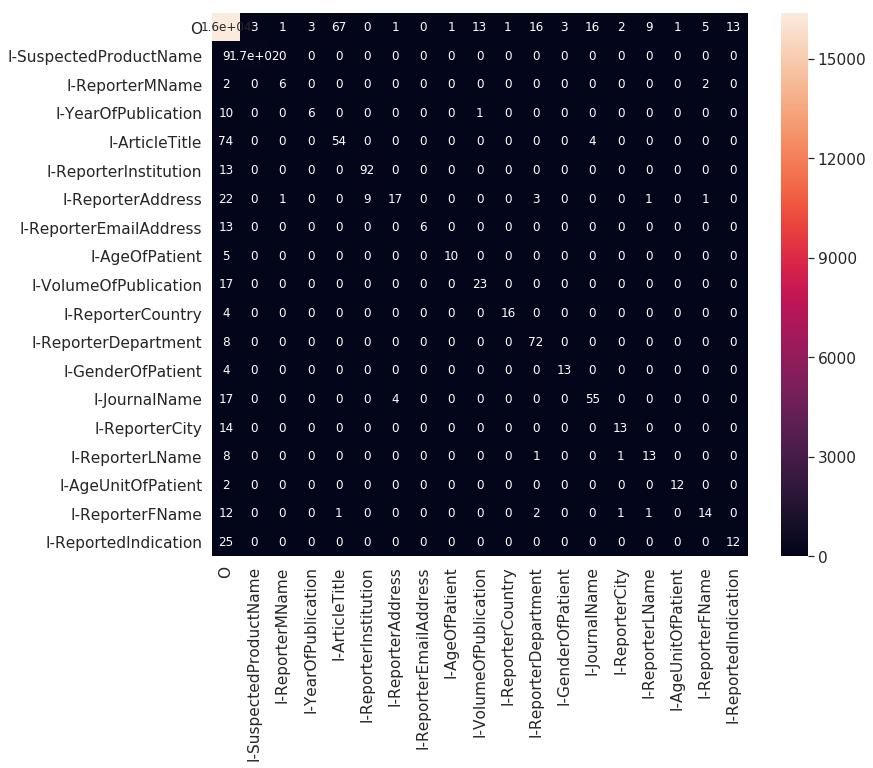

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
        
df_cm = pd.DataFrame(cm, a, a)
plt.figure(figsize = (12,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size